In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.4],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]
])

In [9]:
df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])

In [10]:
standardized_data = (df - df.mean()) / df.std()

In [15]:
cov_matrix = np.cov(standardized_data.T)

In [16]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [17]:
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]

In [19]:
eig_vecs_subset = eig_vecs[:, :2]

In [22]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [24]:
print("\nReduced Data (after PCA): \n", reduced_data)


Reduced Data (after PCA): 
         PC1       PC2
0  1.073689  0.335609
1 -2.511745 -0.298531
2  1.413875 -0.344491
3  0.714595 -0.388087
4  2.457530  0.288456
5  1.456044 -0.252032
6 -0.160889  0.387008
7 -1.766447 -0.020145
8 -0.631095 -0.044738
9 -2.045557  0.336952


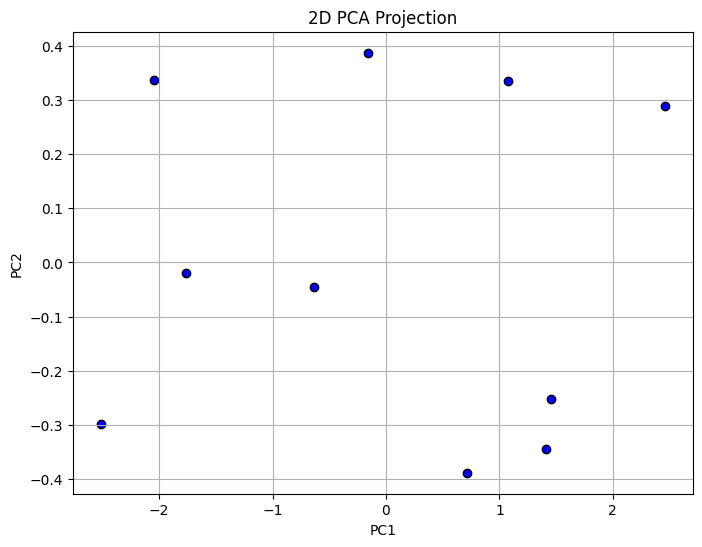

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data['PC1'], reduced_data['PC2'], color='blue',edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()